In [208]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import operator

## Putting Crime in the US in Context
### Svetozar Mateev

First I am going to calculate the total crimes by dividing the population by 100 000 and then multiplying it by the crimes percapita.Then I am going to remove the NaN values.

In [2]:
crime_reports=pd.read_csv("report.csv")
crime_reports=crime_reports.dropna()
crime_reports=crime_reports.reset_index()
crime_reports["total_crimes"]=(crime_reports.population/100000*crime_reports.crimes_percapita)
#crime_reports[["population",'crimes_percapita','total_crimes']]
crime_reports

,index,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,total_crimes
0,0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13,2382.988598
1,1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46,278.000625
2,2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32,8033.018650
3,3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58,610.997466
4,4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10,1214.997840
5,5,1975,MD00301,"Baltimore County, MD",642154.0,1259.0,25.0,137.0,347.0,750.0,12.0,196.06,3.89,21.33,54.04,116.79,1259.007132
6,6,1975,MDBPD00,"Baltimore, MD",864100.0,16086.0,259.0,463.0,6309.0,9055.0,12.0,1861.59,29.97,53.58,730.12,1047.91,16085.999190
7,7,1975,MA01301,"Boston, MA",616120.0,11386.0,119.0,453.0,3036.0,7778.0,12.0,1848.02,19.31,73.52,492.76,1262.42,11386.020824
8,8,1975,NY01401,"Buffalo, NY",422276.0,3350.0,63.0,192.0,755.0,2340.0,12.0,793.32,14.92,45.47,178.79,554.14,3349.999963
9,9,1975,NC06001,"Charlotte, NC",262103.0,1937.0,68.0,71.0,976.0,822.0,12.0,739.02,25.94,27.09,372.37,313.62,1936.993591


•	Have a look at the “months_reported” column values. What do they mean? What percent of the rows have less than 12 months? How significant is that?

In [3]:
crime_reports["months_reported"].unique()
less_than_twelve=crime_reports[crime_reports.months_reported<12]
print(str(len(less_than_twelve)/len(crime_reports.months_reported)*100)+'%')

1.8229166666666667%


The months reported column indicates how much months from the year have been reported and only 1.9% of the rows have less than 12 months reported per year whichn on a 5% level isn't significant.

•	Overall crime popularity: Create a bar chart of crime frequencies (total, not per capita). Display the type of crime and total occurrences (sum over all years). Sort largest to smallest. Are there any patterns? Which crime is most common?

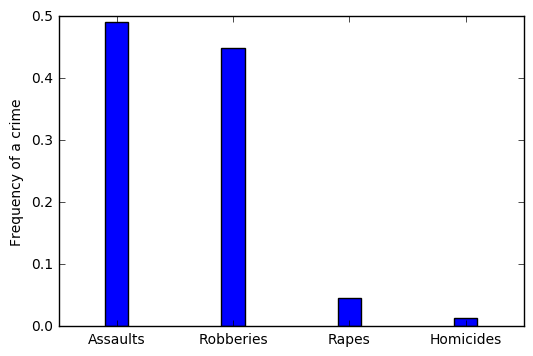

In [4]:
homicides_total_sum=crime_reports.homicides.sum()
rapes_total_sum=crime_reports.rapes.sum()
assaults_total_sum=crime_reports.assaults.sum()
robberies_total_sum=crime_reports.robberies.sum()
total_crimes_total_sum= crime_reports.total_crimes.sum()
homicides_frequency=homicides_total_sum/total_crimes_total_sum
rapes_frequency=rapes_total_sum/total_crimes_total_sum
assaults_frequency=assaults_total_sum/total_crimes_total_sum
robberies_frequency=robberies_total_sum/total_crimes_total_sum

plt.bar(height=[assaults_frequency,robberies_frequency,rapes_frequency,homicides_frequency],left=[1,2,3,4], align = "center",width=0.2)
plt.xticks([1,2,3,4,],['Assaults','Robberies','Rapes','Homicides'])
plt.ylabel("Frequency of a crime")
plt.show()

The most frequent crimes are the assaults and i can see from the diagram that crimes which are less serious are committed more often.

•	Crime popularity by year: Break down the analysis of the previous graph by year. What is the most common crime (total, not per capita) for each year? What is the least common one?

1975 robberies
1976 robberies
1977 robberies
1978 robberies
1979 robberies
1980 robberies
1981 robberies
1982 robberies
1983 robberies
1984 robberies
1985 robberies
1986 robberies
1987 assaults
1988 assaults
1989 assaults
1990 assaults
1991 assaults
1992 assaults
1993 assaults
1994 assaults
1995 assaults
1996 assaults
1997 assaults
1998 assaults
1999 assaults
2000 assaults
2001 assaults
2002 assaults
2003 assaults
2004 assaults
2005 assaults
2006 assaults
2007 assaults
2008 assaults
2009 assaults
2010 assaults
2011 assaults
2012 assaults
2013 assaults
2014 assaults


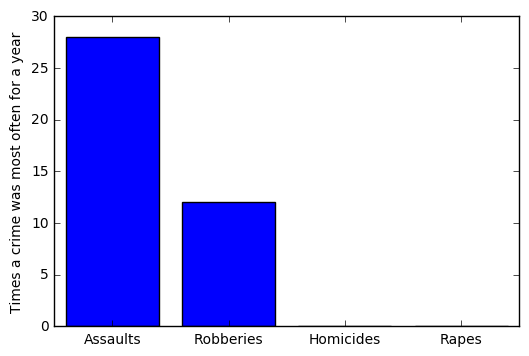

In [79]:
homicides_sum=0
rapes_sum=0
assaults_sum=0
robberies_sum=0
for year in crime_reports.report_year.unique():
    year_df=crime_reports[crime_reports.report_year==year]
    homicides_sum_year=year_df.homicides.sum()
    rapes_sum_year=year_df.rapes.sum()
    assaults_sum_year=year_df.assaults.sum()
    robberies_sum_year=year_df.robberies.sum()
    if(homicides_sum_year>rapes_sum_year and homicides_sum_year>assaults_sum_year and homicides_sum_year>robberies_sum_year):
        homiciedes_sum+=1
        print(str(year)+' '+"homicides")
    elif(homicides_sum_year<rapes_sum_year and rapes_sum_year>assaults_sum_year and rapes_sum_year>robberies_sum_year):
        rapes_sum+=1
        print(str(year)+' '+"rapes")

    elif(homicides_sum_year<assaults_sum_year and rapes_sum_year<assaults_sum_year and assaults_sum_year>robberies_sum_year):
        assaults_sum+=1
        print(str(year)+' '+"assaults")

    elif(homicides_sum_year<robberies_sum_year and rapes_sum_year<robberies_sum_year and assaults_sum_year<robberies_sum_year):
        robberies_sum+=1
        print(str(year)+' '+"robberies")


plt.bar(height=[assaults_sum,robberies_sum,homicides_sum,rapes_sum],left=[1,2,3,4],align='center')#most common one through the years
plt.xticks([1,2,3,4,],['Assaults','Robberies','Homicides','Rapes'])
plt.ylabel("Times a crime was most often for a year")
plt.show()


I can see from the bar chart that assault were the most popular crime for a year almost thirty time and that the homicides and rapes were never the most popular crime for a year.

•	Crime evolution (e. g. crime rates as a function of time): How do crime rates per capita evolve over the years? Create a plot (or a series) of plots displaying how each rate evolves. Create another plot of all crimes (total, not per capita) over the years.

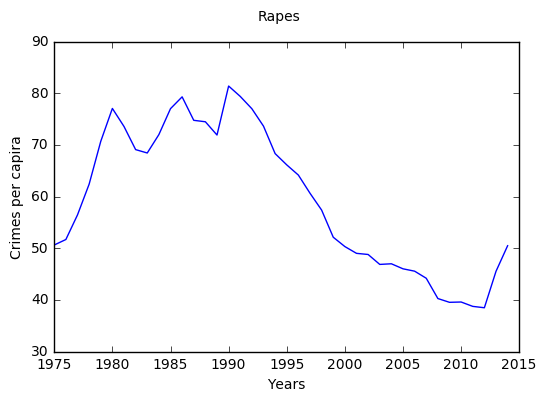

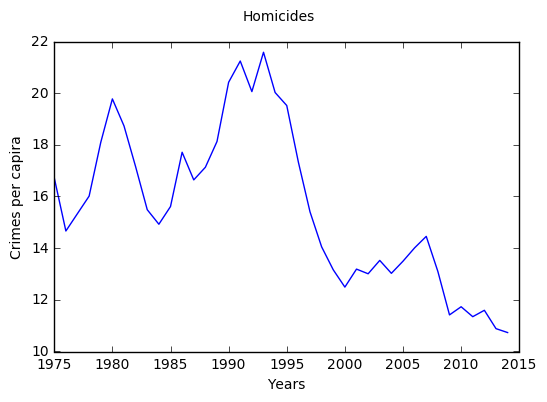

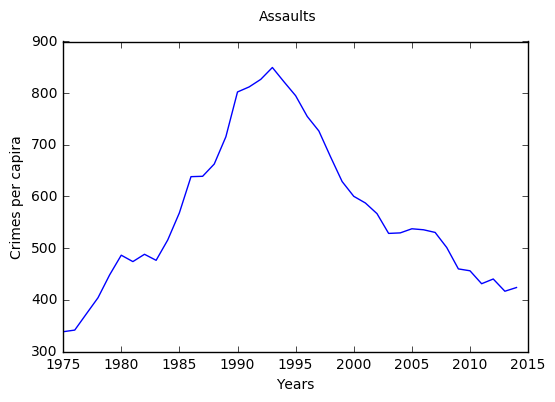

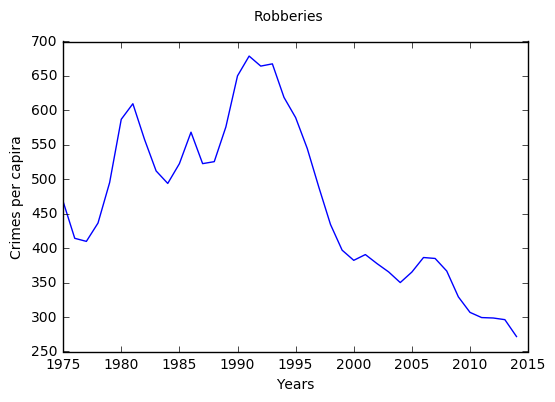

In [6]:
rapes_per_capita=[]
homicides_per_capita=[]
assaults_per_capita=[]
robberies_per_capita=[]
for year in crime_reports.report_year.unique():
    year_df=crime_reports[crime_reports.report_year==year]
    homicides_mean_year=year_df.homicides_percapita.mean()
    rapes_mean_year=year_df.rapes_percapita.mean()
    assaults_mean_year=year_df.assaults_percapita.mean()
    robberies_mean_year=year_df.robberies_percapita.mean()
   
    homicides_per_capita.append(homicides_mean_year)
    
    rapes_per_capita.append(rapes_mean_year)
    
    assaults_per_capita.append(assaults_mean_year)

    robberies_per_capita.append(robberies_mean_year)
plt.plot(crime_reports.report_year.unique(),rapes_per_capita)
plt.suptitle("Rapes")
plt.xlabel("Years")
plt.ylabel('Crimes per capira')
plt.show()
plt.plot(crime_reports.report_year.unique(),homicides_per_capita)
plt.suptitle("Homicides")
plt.xlabel("Years")
plt.ylabel('Crimes per capira')
plt.show()
plt.plot(crime_reports.report_year.unique(),assaults_per_capita)
plt.suptitle("Assaults")
plt.xlabel("Years")
plt.ylabel('Crimes per capira')
plt.show()
plt.plot(crime_reports.report_year.unique(),robberies_per_capita)
plt.suptitle("Robberies")
plt.xlabel("Years")
plt.ylabel('Crimes per capira')
plt.show()

From the plots we can see that each crime has significanttly lower rate per capita and that for all of them the peak was between 1990 and 1995.

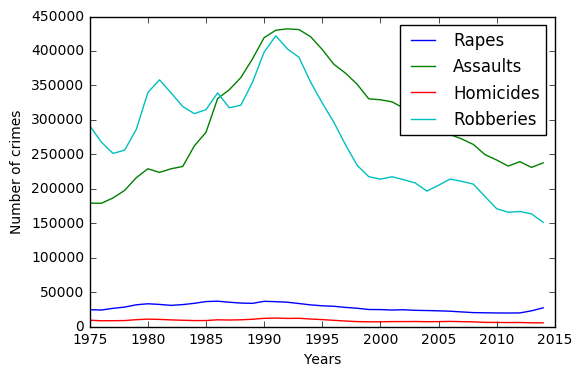

In [7]:
rapes_per_year=[]
homicides_per_year=[]
assaults_per_year=[]
robberies_per_year=[]
for year in crime_reports.report_year.unique():
    year_df=crime_reports[crime_reports.report_year==year]
    homicides_mean_year=year_df.homicides.sum()
    rapes_mean_year=year_df.rapes.sum()
    assaults_mean_year=year_df.assaults.sum()
    robberies_mean_year=year_df.robberies.sum()
   
    homicides_per_year.append(homicides_mean_year)
    
    rapes_per_year.append(rapes_mean_year)
    
    assaults_per_year.append(assaults_mean_year)

    robberies_per_year.append(robberies_mean_year)
plt.plot(crime_reports.report_year.unique(),rapes_per_year,label="Rapes")
plt.plot(crime_reports.report_year.unique(),assaults_per_year,label="Assaults")
plt.plot(crime_reports.report_year.unique(),homicides_per_year,label="Homicides")
plt.plot(crime_reports.report_year.unique(),robberies_per_year,label="Robberies")
plt.legend()
plt.ylabel("Number of crimes")
plt.xlabel("Years")
plt.show()

Again our observations are confirmed that the peak of the crimes is around 1990 and that in present there are a lot less crimes except the rapes which between 2010 and 2015 have begun raise slightly.

## Crimes by States

•	“Criminal” jurisdictions: Plot the sum of all crimes (total, not per capita) for each jurisdiction. Sort largest to smallest. Are any jurisdictions more prone to crime?

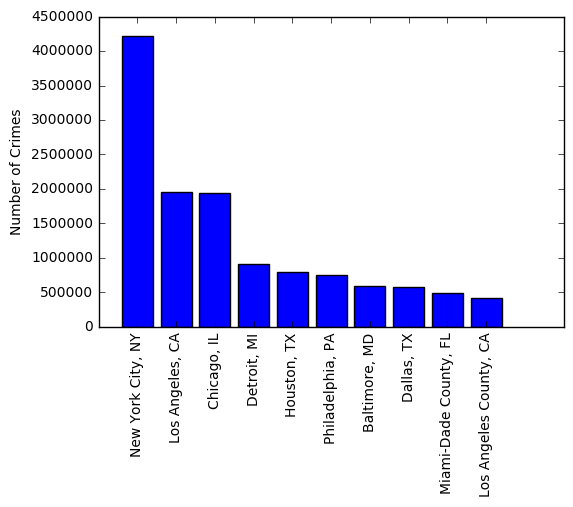

In [95]:
#agency_jurisdiction
jurisdicitons=[]
counter=0
crimes_per_jurisdiction=[]
agencies_df=crime_reports.sort_values('violent_crimes',ascending=False)

for jurisdiciton in agencies_df.agency_jurisdiction.unique():
    jurisdicition_df=agencies_df[agencies_df.agency_jurisdiction==jurisdiciton]
    all_crimes=jurisdicition_df.violent_crimes.sum()
    crimes_per_jurisdiction.append(all_crimes)
    counter+=1
    jurisdicitons.append(jurisdiciton)
    if counter==10:
        break
df_plottt=pd.DataFrame({'area':jurisdicitons,'num':crimes_per_jurisdiction})
df_plottt=df_plottt.sort_values('num',ascending=False)
plt.bar(height=df_plottt.num,left=[1,2,3,4,5,6,7,8,9,10],align='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10],df_plottt.area,rotation='vertical')
plt.ylabel("Number of Crimes")
plt.show()

From the bar chart we can see that the New York City,Ny jurisdiction has the most crimes.

•	“Criminal” jurisdictions, part 2: Create the same type of chart as above, but use the crime rates per capita this time. Are you getting the same distribution? Why? You may need data from the “population” column to answer this. Don’t perform significance tests, just inspect the plots.

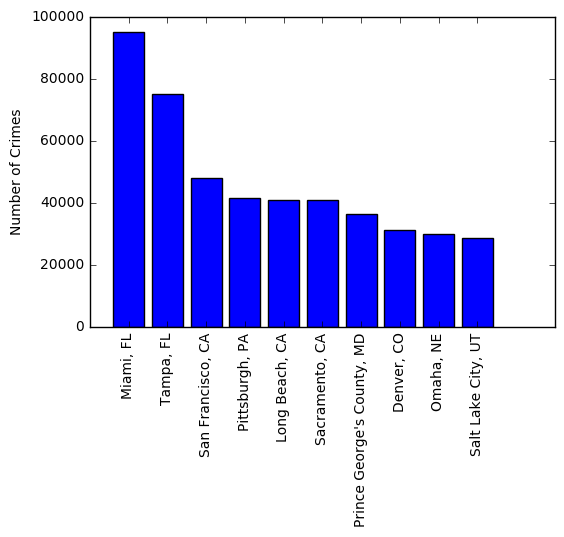

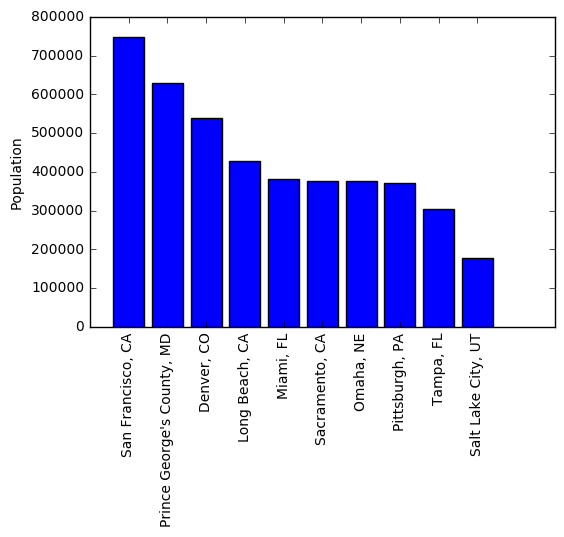

In [98]:
jurisdicitons=[]
counter=0
crimes_per_jurisdiction=[]
population=[]
agencies_df=crime_reports
agencies_df=crime_reports.sort_values('crimes_percapita',ascending=False)

for a in agencies_df.agency_jurisdiction.unique():
    agencies_df["crimes_percapita_per_agency"]=agencies_df[agencies_df.agency_jurisdiction==jurisdiciton].crimes_percapita.sum()
agencies_df=agencies_df.sort_values('crimes_percapita_per_agency',ascending=True)

for jurisdiciton in agencies_df.agency_jurisdiction.unique():
    jurisdicition_df=agencies_df[agencies_df.agency_jurisdiction==jurisdiciton]
    all_crimes=jurisdicition_df.crimes_percapita.sum()
    crimes_per_jurisdiction.append(all_crimes)
    counter+=1
    jurisdicitons.append(jurisdiciton)
    population.append(jurisdicition_df.population.mean())
    if counter==10:
        break

df_plot=pd.DataFrame({'jurisdicitons':jurisdicitons,'num':crimes_per_jurisdiction})
df_plot=df_plot.sort_values('num',ascending=False,axis=0)
plt.bar(height=df_plot.num,left=[1,2,3,4,5,6,7,8,9,10],align='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10],df_plot.jurisdicitons,rotation='vertical')
plt.ylabel("Number of Crimes")
plt.show()

df_pop_plot=pd.DataFrame({'area':jurisdicitons,'num':population})
df_pop_plot=df_pop_plot.sort_values('num',ascending=False,axis=0)
plt.bar(height=df_pop_plot.num,left=[1,2,3,4,5,6,7,8,9,10],align='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10],df_pop_plot.area,rotation='vertical')
plt.ylabel("Population")
plt.show()

We can see that the crime per capita in Miami is the biggest contary to the previous plot. However it appears to have little correlation between the number of crimes per capita and the population.

•	“Criminal states”: Create the same type of chart as in the first subproblem, but use the states instead. You can get the state name in two ways: either the first two letters of the agency_code column or the symbols after the comma in the agency_jurisdiction column.

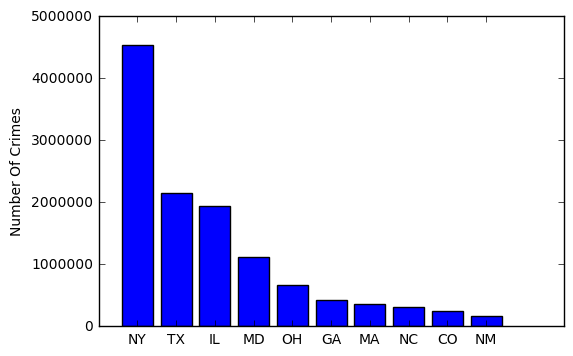

In [94]:
parts=crime_reports['agency_jurisdiction'].str.extract("(\w+), (\w+)", expand = True)
parts.columns=['something_else','state']
parts['state']
crime_reports['state']=parts['state']

crime_states=[]
total_crimes=[]
counter=0
gencies_df=crime_reports.sort_values('violent_crimes',ascending=False)
for state in crime_reports.state.unique():
    jurisdicition_df=crime_reports[crime_reports.state==state]
    all_crimes=jurisdicition_df.violent_crimes.sum()
    total_crimes.append(all_crimes)
    crime_states.append(state)
    counter+=1
    jurisdicitons.append(jurisdiciton)
    if counter==10:
        break
        
plot_df=pd.DataFrame({'states':crime_states,'num':total_crimes})
plot_df=plot_df.sort_values('num',ascending=False)
plt.bar(height=plot_df.num,left=[1,2,3,4,5,6,7,8,9,10],align='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10],plot_df.states)
plt.ylabel("Number Of Crimes")
plt.show()


From the chart we can see that New York has the biggest number of crimes.

•	Hypothesis testing: Are crime rates per capita related to population, e. g. does a more densely populated community produce more crime (because there are more people), or less crime (because there is a better police force)? Plot the total number of crimes vs. population to find out. Is there any correlation? If so, what is it? Is the correlation significant?

10 10


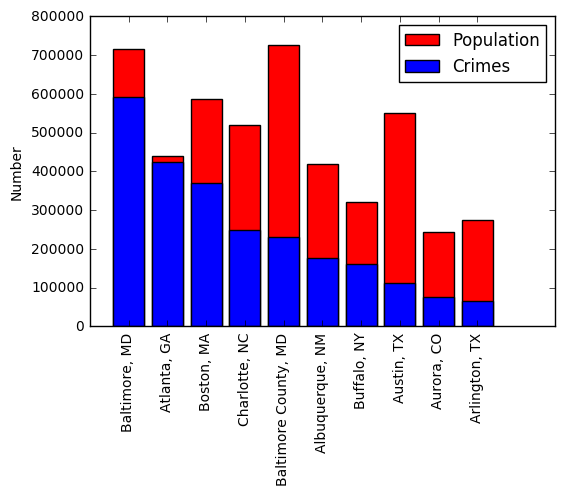

In [135]:
total_crimes=[]
agency_jurisdiction=[]
population=[]
counter=0
for jurisdiction in crime_reports.agency_jurisdiction.unique():
    jurisdicition_df=crime_reports[crime_reports.agency_jurisdiction==jurisdiction]
    all_crimes=jurisdicition_df.violent_crimes.sum()
    total_crimes.append(all_crimes)   
    counter+=1
    agency_jurisdiction.append(jurisdiction)
    population.append(jurisdicition_df.population.mean())
    if counter==10:
        break
print(len(total_crimes),len(agency_jurisdiction))   


plot_df=pd.DataFrame({'states':agency_jurisdiction,'num':total_crimes,'popu':population})
plot_df=plot_df.sort_values('num',ascending=False)
plt.bar(height=plot_df.popu,left=[1,2,3,4,5,6,7,8,9,10],align='center',color='r',label="Population")

plt.bar(height=plot_df.num,left=[1,2,3,4,5,6,7,8,9,10],align='center',color='b',label="Crimes")

plt.xticks([1,2,3,4,5,6,7,8,9,10],plot_df.states,rotation='vertical')
plt.ylabel("Number")
plt.legend()
plt.show()


We can see that there isn't a corelation between the population and the crimes because some places like Atlanta,GA shows that there might be but others like Baltimore Country,MD show us totaly different results

## Additional data

First I am  droping some of the unnecessary columns and then I am tranforming the dates to datetime objects.

In [138]:
crimes=pd.read_csv("crimes.csv")
crimes=crimes.drop(['x','y','OBJECTID','ESRI_OID','Time'],axis=1)
crimes.columns=['publicaddress', 'controlnbr', 'CCN', 'precinct', 'reported_date',
       'begin_date', 'offense', 'description', 'UCRCode', 'entered_date',
       'long', 'lat', 'neighborhood', 'lastchanged', 'last_update_date']
crimes.dtypes
#2015-09-21T14:16:59.000Z
crimes['reported_date']=pd.to_datetime(crimes['reported_date'],format='%Y-%m-%d',errors='ignore')
crimes['entered_date']=pd.to_datetime(crimes['entered_date'],format='%Y-%m-%d',errors='ignore')
crimes['lastchanged']=pd.to_datetime(crimes['lastchanged'],format='%Y-%m-%d',errors='ignore')
crimes['last_update_date']=pd.to_datetime(crimes['last_update_date'],format='%Y-%m-%d',errors='ignore')
crimes['begin_date']=pd.to_datetime(crimes['begin_date'],format='%Y-%m-%d',errors='ignore')
crimes=crimes.dropna()

AttributeError: 'Series' object has no attribute 'year'

•	Total number of crimes per year: Count all crimes for years in the dataset (2010-2016). Print the total number.

In [140]:
print(str(len(crimes))+" "+"crimes between 2010 and 2016")

135966 crimes between 2010 and 2016


•	Plot how crimes evolve each year

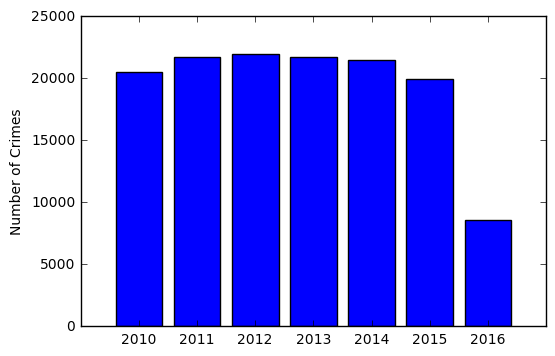

In [152]:
year_10=0
year_11=0
year_12=0
year_13=0
year_14=0
year_15=0
year_16=0

for date in crimes.begin_date:
    if date.year==2010:
        year_10+=1
    elif date.year==2011:
        year_11+=1
    elif date.year==2012:
        year_12+=1
    elif date.year==2013:
        year_13+=1
    elif date.year==2014:
        year_14+=1    
    elif date.year==2015:
        year_15+=1
    elif date.year==2016:
        year_16+=1
plt.bar(height=[year_10,year_11,year_12,year_13,year_14,year_15,year_16],left=[1, 2, 3, 4 ,5 ,6 ,7],align='center')
plt.ylabel("Number of Crimes")
plt.xticks([1, 2, 3, 4 ,5 ,6 ,7],['2010','2011','2012','2013','2014','2015','2016',])
plt.show()

From 2010 to 2012 ther is a sligth raise in the number of crimes.However from 2012 to 2016 there is a drop in the number of crimes committed.

•	Compare the previous plot to the plots in the previous exercise.
Note: In order to make comparison better, plot the data for all states again, but this time filter only years 2010-2016. Does the crime rate in MN have any connection to the total crime rate? What percentage of the total crime rate (in all given states) is given by MN?


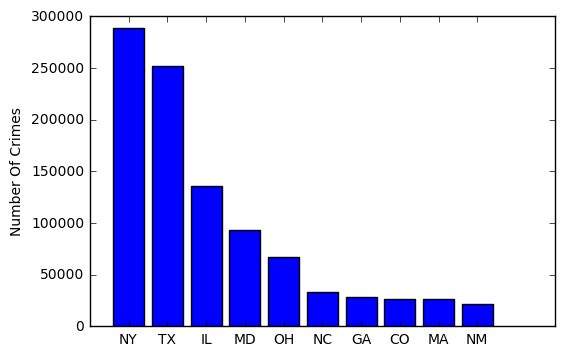

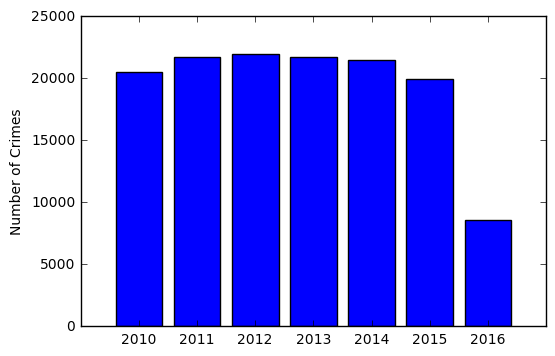

0.13964551980124296 % from the total number of crimes committed between 2010 and 2016


In [172]:
crime_states=[]
total_crimes=[]
counter=0
gencies_df=crime_reports.sort_values('violent_crimes',ascending=False)
for state in crime_reports.state.unique():
    jurisdicition_df=crime_reports[crime_reports.state==state]
    right_year=jurisdicition_df[jurisdicition_df.report_year>2009]
   
    all_crimes=right_year.violent_crimes.sum()
    total_crimes.append(all_crimes)
    crime_states.append(state)
    counter+=1
    jurisdicitons.append(jurisdiciton)
    if counter==10:
        break
        
plot_df=pd.DataFrame({'states':crime_states,'num':total_crimes})
plot_df=plot_df.sort_values('num',ascending=False)
plt.bar(height=plot_df.num,left=[1,2,3,4,5,6,7,8,9,10],align='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10],plot_df.states)
plt.ylabel("Number Of Crimes")
plt.show()

year_10=0
year_11=0
year_12=0
year_13=0
year_14=0
year_15=0
year_16=0

for date in crimes.begin_date:
    if date.year==2010:
        year_10+=1
    elif date.year==2011:
        year_11+=1
    elif date.year==2012:
        year_12+=1
    elif date.year==2013:
        year_13+=1
    elif date.year==2014:
        year_14+=1    
    elif date.year==2015:
        year_15+=1
    elif date.year==2016:
        year_16+=1
plt.bar(height=[year_10,year_11,year_12,year_13,year_14,year_15,year_16],left=[1, 2, 3, 4 ,5 ,6 ,7],align='center')
plt.ylabel("Number of Crimes")
plt.xticks([1, 2, 3, 4 ,5 ,6 ,7],['2010','2011','2012','2013','2014','2015','2016',])
plt.show()
whole_number = sum(i for i in total_crimes)

print(str(len(crimes)/whole_number)+' '+'% from the total number of crimes committed between 2010 and 2016')

•	Cross-dataset matching: Get data from the previous dataset (crime rates in the US) again. This time, search only for MN and only for years 2010-2016. Do you have any results? If so, the results for total crime in MN should match in both datasets. Do they match?

19789 from the first data set
135966 from the second data set


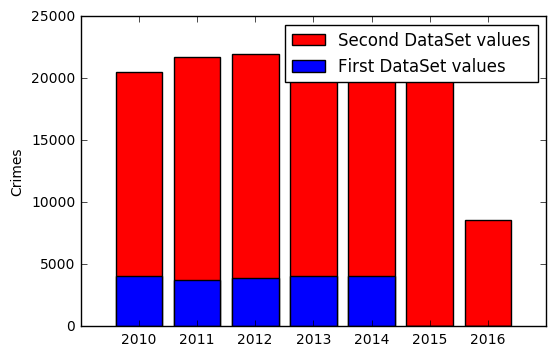

In [202]:
year_10n=4064.0
year_11n=3722.0
year_12n=3872.0
year_13n=4038.0
year_14n=4093.0
year_15n=0
year_16n=0
MN=crime_reports[crime_reports.state=="MN"]
MN=MN[MN.report_year>2009]
number_crimes=sum(MN.violent_crimes)
print(str(int(number_crimes))+" from the first data set")
print(str(len(crimes))+" "+"from the second data set")



year_10=0
year_11=0
year_12=0
year_13=0
year_14=0
year_15=0
year_16=0

for date in crimes.begin_date:
    if date.year==2010:
        year_10+=1
    elif date.year==2011:
        year_11+=1
    elif date.year==2012:
        year_12+=1
    elif date.year==2013:
        year_13+=1
    elif date.year==2014:
        year_14+=1    
    elif date.year==2015:
        year_15+=1
    elif date.year==2016:
        year_16+=1
plt.bar(height=[year_10,year_11,year_12,year_13,year_14,year_15,year_16],left=[1, 2, 3, 4 ,5 ,6 ,7],align='center',color='r',label="Second DataSet values")

plt.bar(height=[year_10n,year_11n,year_12n,year_13n,year_14n,year_15n,year_16n],left=[1,2,3,4,5,6,7],align='center',color='b',label="First DataSet values")
plt.legend()
plt.xticks([1,2,3,4,5,6,7],['2010','2011','2012','2013','2014','2015','2016',])
plt.ylabel("Crimes")
plt.show()


The values in the first data set are until 2014 and they are much smaller than those in the second.There is a big difference between the two.

## Temporal Analysis

•	Look at the crime categories. Which is the most popular crime category in MN overall?

In [210]:
crimes.description.unique()
d={'Shoplifting':1, 'Theft From Motr Vehc':1, 'Other Theft':1,
       'Theft From Building':1, 'Crim Sex Cond-rape':1, 'Burglary Of Dwelling':1,
       'Theft From Person':1, 'Motor Vehicle Theft':1, 'Robbery Of Business':1,
       'Aslt-police/emerg P':1, 'Domestic Assault/Strangulation':1,
       'Theft-motr Veh Parts':1, 'Robbery Of Person':1, 'Asslt W/dngrs Weapon':1,
       'Robbery Per Agg':1, 'Burglary Of Business':1, 'Arson':1,
       'Theft By Swindle':1, 'Aslt-great Bodily Hm':1, 'Aslt-sgnfcnt Bdly Hm':1,
       'On-line Theft':1, '2nd Deg Domes Aslt':1, 'Murder (general)':1,
       'Adulteration/poison':1, 'Gas Station Driv-off':1,
       'Other Vehicle Theft':1, '3rd Deg Domes Aslt':1, 'Pocket-picking':1,
       'Theft/coinop Device':1, 'Disarm a Police Officer':1,
       'Theft By Computer':1, '1st Deg Domes Asslt':1, 'Bike Theft':1,
       'Scrapping-Recycling Theft':1, 'Justifiable Homicide':0, 'Looting':1}
for desc in crimes.description:
    d[desc]+=1
sorted_d = sorted(d.items(), key=operator.itemgetter(1))
print(sorted_d)

[('Justifiable Homicide', 1), ('Looting', 2), ('Disarm a Police Officer', 8), ('On-line Theft', 12), ('Pocket-picking', 16), ('1st Deg Domes Asslt', 18), ('Theft By Computer', 24), ('Adulteration/poison', 31), ('Theft/coinop Device', 58), ('Scrapping-Recycling Theft', 61), ('Gas Station Driv-off', 84), ('Other Vehicle Theft', 108), ('Aslt-great Bodily Hm', 140), ('Murder (general)', 163), ('3rd Deg Domes Aslt', 417), ('Theft From Building', 581), ('Aslt-police/emerg P', 608), ('Arson', 723), ('Robbery Of Business', 726), ('Theft-motr Veh Parts', 756), ('Aslt-sgnfcnt Bdly Hm', 1180), ('Theft By Swindle', 1236), ('2nd Deg Domes Aslt', 1487), ('Domestic Assault/Strangulation', 1617), ('Crim Sex Cond-rape', 1732), ('Theft From Person', 2391), ('Asslt W/dngrs Weapon', 3900), ('Bike Theft', 3921), ('Burglary Of Business', 4448), ('Robbery Of Person', 4697), ('Robbery Per Agg', 5294), ('Shoplifting', 5653), ('Motor Vehicle Theft', 10507), ('Theft From Motr Vehc', 22425), ('Burglary Of Dwellin

The most common type is Other theft but since it si do unclear we can say that Burglary of Dwelling is the most commnon type of theft.

•	Break down the data by months. Plot the total number of crimes for each month, summed over the years. Is there a seasonal component? Which month has the highest crime rate? Which has the smallest? Are the differences significant?


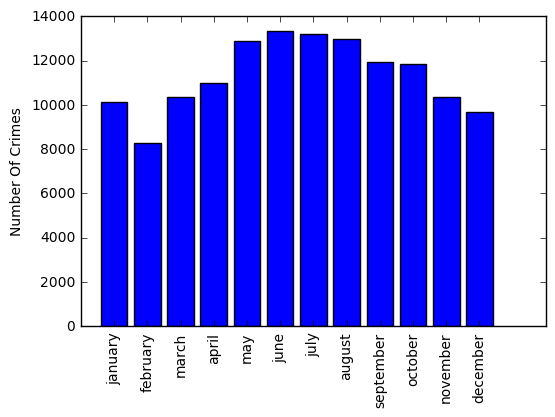

In [231]:
january=0
february=0
march=0
april=0
may=0
june=0
july=0
august=0
september=0
october=0
november=0
december=0
for date in crimes.begin_date:
    if(date.month==1):
        january+=1
    elif(date.month==2):
        february+=1
    elif(date.month==3):
        march+=1
    elif(date.month==4):
        april+=1
    elif(date.month==5):
        may+=1
    elif(date.month==6):
        june+=1
    elif(date.month==7):
        july+=1
    elif(date.month==8):
        august+=1
    elif(date.month==9):
        september+=1
    elif(date.month==10):
        october+=1
    elif(date.month==11):
        november+=1
    elif(date.month==12):
        december+=1
plt.bar(height=[january,february,march,april,may,june,july,august,september,october,november,december]
        ,left=[1,2,3,4,5,6,7,8,9,10,11,12],align='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
           ['january','february','march','april','may','june','july','august','september','october','november','december']
           ,rotation='vertical')
plt.ylabel("Number Of Crimes")
plt.show()

We can see that most of the crimes are in june and that there is seasonal tendency that most of the crimes are committer in the summer.

•	Break the results by weekday. You can get the weekday from the date (there are functions for this). Do more crimes happen on 
the weekends?

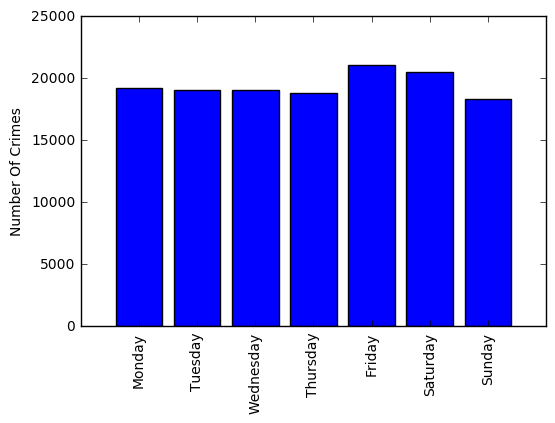

In [243]:
Monday=0
Tuesday=0
Wednesday=0
Thursday=0
Friday=0
Saturday=0
Sunday=0
for date in crimes.begin_date:
    if(date.weekday()==0):
        Monday+=1
    elif(date.weekday()==1):
        Tuesday+=1
    elif(date.weekday()==2):
        Wednesday+=1
    elif(date.weekday()==3):
        Thursday+=1
    elif(date.weekday()==4):
        Friday+=1
    elif(date.weekday()==5):
        Saturday+=1
    elif(date.weekday()==6):
        Sunday+=1
    
plt.bar(height=[Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday]
        ,left=[1,2,3,4,5,6,7],align='center')
plt.xticks([1,2,3,4,5,6,7],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation='vertical')
plt.ylabel("Number Of Crimes")
plt.show()

Most crimes are committed on Fridays.On the second place are Thursdays.

•	Break the weekday data by crime type. Are certain types of crime more likely to happen on a given day? Comment your findings.
I have no time to complete this because I have a Programming Fundamentals Exam to take but I would make 7 plots one for each day of the week with the top 10 types of crimes.

## 5.	Significant Factors in Crime

In [221]:
communities= pd.read_table("communities.data",sep=',',header=None)
communities.columns
communities_names= pd.read_table('communities.names',header=None)
communities_names

,0
0,Title: Communities and Crime
1,Abstract: Communities within the United States...
2,"from the 1990 US Census, law enforcement data ..."
3,data from the 1995 FBI UCR.
4,----------------------------------------------...
5,Data Set Characteristics: Multivariate
6,Attribute Characteristics: Real
7,Associated Tasks: Regression
8,Number of Instances: 1994
9,Number of Attributes: 128
